In [1]:
%ls

clean_tweet.csv  trainingandtestdata/     Untitled.ipynb
sentiment.ipynb  trainingandtestdata.zip


In [2]:
%ls

clean_tweet.csv  trainingandtestdata/     Untitled.ipynb
sentiment.ipynb  trainingandtestdata.zip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading training data (this training data is sentiment140, exctracted by stanford university)
this is a data with sentiments with values 0, 4, for negetive and positive sentiments , respectively.

In [6]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("./trainingandtestdata/training.1600000.processed.noemoticon.csv",header=None, names=cols)
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 80-81: invalid continuation byte

In [7]:
df.sentiment.value_counts()

NameError: name 'df' is not defined

In [12]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [16]:
df.head(2)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...


In [17]:
df['pre_clean_len'] = [len(t) for t in df.text]

Checking for lengths of tweet more than 140 character, which is unsusall, as twitter allows only 140 characters.

In [23]:
for i in range(1000):
    if df.pre_clean_len[i] > 140:
        print df.text[i] + " __ " + str(df.pre_clean_len[i])

Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot;  O-: I like the look of the new transformer movie  __ 142
Tuesday�ll start with reflection �n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers  __ 141
Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly.  __ 145
@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down  __ 145
#3 woke up and was having an accident - &quot;It's pushing, it's pushing!&quot; he was crying because he couldn't stop from wetting his pants.   __ 144
My bathtub drain is fired: it haz 1 job 2 do, &amp; it iz FAIL. I got all Drano on its ass, &amp; iz STILL NOT DRAINING. I wanna shower, dangit!!  __ 146
pears &amp; Brie, bottle of Cabernet, and &quot;Win a Date With Tad Hamilton&quot;... oh gaww

Clearly, html decoding is neccessary to clean the tweets, and also some urls and user id would have to be eliminated.

Creating a data dictionary to easy understanding of our data, and from concise explanation to the 

In [25]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


BoxPlot for the length of the text in the tweets

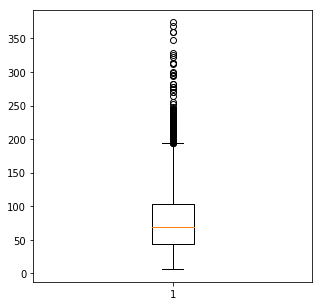

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [28]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesday�ll start with reflection �n then a lec...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


Importing beautifulsoup library for cleaning html special characters and converting to english charachters
And testing the example of one specific tweet

In [34]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print "Original : " + str(df.text[279])
print "______________________________________________________"
print "Parsed : " + str(example1.get_text() )

Original : Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. 
______________________________________________________
Parsed : Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


Eleminating @mentions from the tweets as they carry no information for our tweets, and testing an example tweet

In [36]:
import re
example2 = re.sub(r'@[A-Za-z0-9]+','',df.text[343])
print "Original : " + str(df.text[343])
print "______________________________________________________"
print "Parsed : " + str(example2)

Original : @TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 
______________________________________________________
Parsed :  Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 


Eliminating links from the tweet if any and testing with example

In [37]:
example3 = re.sub('https?://[A-Za-z0-9./]+','',df.text[0])
print "Original : " + str(df.text[0])
print "______________________________________________________"
print "Parsed : " + str(example3)

Original : @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
______________________________________________________
Parsed : @switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


Eliminating UTF Bombs and testing with example

In [42]:
testing = df.text[226].decode("utf-8-sig")
print testing
testing.replace(u"\ufffd", "?")
print testing

Tuesday�ll start with reflection �n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 
Tuesday�ll start with reflection �n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 
Tuesday�ll start with reflection �n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 


Converting hashtag into normal text for analysis

In [43]:
example5 = re.sub("[^a-zA-Z]", " ", df.text[175])
print "Original : " + str(df.text[175])
print "______________________________________________________"
print "Parsed : " + str(example5)

Original : @machineplay I'm so sorry you're having to go through this. Again.  #therapyfail
______________________________________________________
Parsed :  machineplay I m so sorry you re having to go through this  Again    therapyfail


Now defining our method for text cleaning of all tweets.

In [49]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

#pattern to remove mentions and links from the tweet
pattern1 = r'@[A-Za-z0-9]+'
pattern2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pattern1, pattern2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    #replace the pattern with nothing '' in the tweet
    stripped = re.sub(combined_pat, '', souped)
    #try - except to replace utf-BOMB
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    #last clean for all english letters only
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    #print "Letters only : " + str(lower_case)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

testing = df.text[10:20]

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
for t in test_result:
    print t

spring break in plain city it s snowing
i just re pierced my ears
i couldn t bear to watch it and i thought the ua loss was embarrassing
it it counts idk why i did either you never talk to me anymore
i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown
i wish i got to watch it with you i miss you and how was the premiere
hollis death scene will hurt me severely to watch on film wry is directors cut not out now
about to file taxes
ahh ive always wanted to see rent love the soundtrack
oh dear were you drinking out of the forgotten table drinks


Cleaning whole data now, 1600k data 

In [50]:
nums = [0,400000,800000,1200000,1600000]
print "Cleaning and parsing the tweets...\n"
clean_tweet_texts = []
for i in xrange(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print "Tweets %d of %d has been processed" % ( i+1, nums[1] )                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has

In [ ]:
Saving Clean dataset to the csv ,

In [53]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment

#saving to csv format
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0
